<a href="https://colab.research.google.com/github/jcorner1/PhD_UVA_Repo/blob/main/Convective_mode_Anchors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from matplotlib.colors import ListedColormap

def radar_colormap():
    r"""Returns an NWS colormap.

    Parameters
    ----------

    Returns
    -------
    cmap: ListedColormap
        NWS-like radar colormap.
    """

    nws_reflectivity_colors = ["#ffffff",  # 0
                               "#04e9e7",  # 5
                               "#019ff4",  # 10
                               "#0300f4",  # 15
                               "#02fd02",  # 20
                               "#01c501",  # 25
                               "#008e00",  # 30
                               "#fdf802",  # 35
                               "#e5bc00",  # 40
                               "#fd9500",  # 45
                               "#fd0000",  # 50
                               "#d40000",  # 55
                               "#bc0000",  # 60
                               "#f800fd",  # 65
                               "#9854c6",  # 70
                               "#4B0082",  # 75
                               "#000000"]

    cmap = ListedColormap(nws_reflectivity_colors)

    return cmap

In [ ]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
def radar_norm():
    r"""Return a colormap and normalization that allow you to represent
    radar data with colors every 5 dBZ that mimics the official NWS
    radar images.

    Parameters
    ----------

    Returns
    -------
    cmap: ListedColormap
        NWS-like radar colormap.
    norm: BoundaryNorm
        Normalization for 5 dBZ levels (0-80).
    """

    cmap = radar_colormap()
    classes = np.array(list(range(0, 85, 5)))
    norm = BoundaryNorm(classes, ncolors=cmap.N)

    return cmap, norm

cmap, norm = radar_norm()

In [ ]:
! pip install alibi
from alibi.explainers import AnchorImage

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.1 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 24.2.0
    Uninstalling attrs-24.2.0:
      Successfully uninstalled attrs-24.2.0
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.24.0
    Uninstalling scikit-image-0.24.0:
      Successfully uninstalled scikit-image-0.24.0


In [ ]:
import numpy as np
import pandas as pd
import glob

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [ ]:
#load the CNN model
model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/anya/future_modes_v2.h5')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 12)        │             984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 120, 120, 24)        │          23,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 24, 24, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 48)          │          93,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 3, 3, 48)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 432)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │           1,732 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,430 (466.53 KB)

 Trainable params: 119,428 (466.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
with open("/content/drive/My Drive/Colab Notebooks/UVA/Dissertation/svrimg_new_mode_test.pkl", "rb") as f:
    (x_test, y_test) = pickle.load(f)

x_test = x_test.astype("float32") / 80
y_test = keras.utils.to_categorical(y_test, 4)

29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 868ms/step
Confusion Matrix
[[135   7   0   0]
 [  8 135   4   4]
 [  0   3 505   6]
 [  0   1   0 112]]
Classification Report
              precision    recall  f1-score   support

    Cellular       0.94      0.95      0.95       142
  Mixed Mode       0.92      0.89      0.91       151
      Linear       0.99      0.98      0.99       514
       Other       0.92      0.99      0.95       113

    accuracy                           0.96       920
   macro avg       0.94      0.95      0.95       920
weighted avg       0.96      0.96      0.96       920



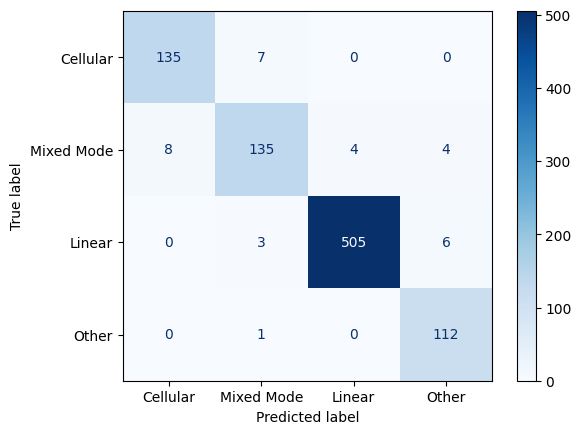

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_ = np.argmax(y_test, axis=1)

print('Confusion Matrix')
print(confusion_matrix(y_test_, y_pred))
print('Classification Report')
target_names = ['Cellular', 'Mixed Mode', 'Linear', 'Other']
print(classification_report(y_test_, y_pred, target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_, y_pred), display_labels=target_names)
disp.plot(cmap='Blues')

In [ ]:
image_shape = x_test.shape
image_shape

(920, 136, 136, 1)

In [ ]:
def superpixel(image, size=(4, 7)):
    segments = np.zeros([image.shape[0], image.shape[1]])
    row_idx, col_idx = np.where(segments == 0)
    for i, j in zip(row_idx, col_idx):
        segments[i, j] = int((image.shape[1]/size[1]) * (i//size[0]) + j//size[1])
    return segments

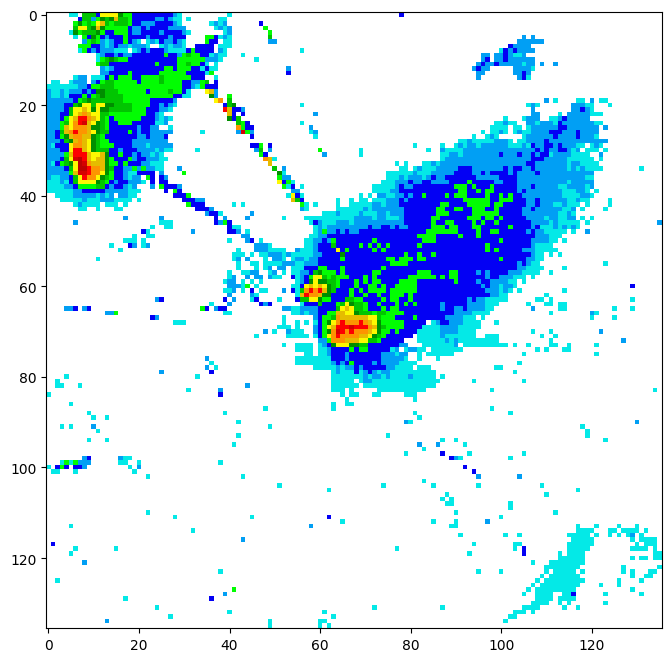

In [ ]:
fig = plt.figure(figsize=(8.5,8))
ax = plt.subplot(1,1,1)
mmp = ax.imshow(np.flipud(x_test[7,:,:,0]) * 80, cmap=cmap, norm=norm)

In [ ]:
predict_fn = lambda x: model.predict(x)

explainer = AnchorImage(predict_fn, image_shape[1:], segmentation_fn='slic')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [ ]:
explanation = explainer.explain(x_test[7,:,:,:], threshold=.95, p_sample=.9, seed=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 487ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 522ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 832ms/step


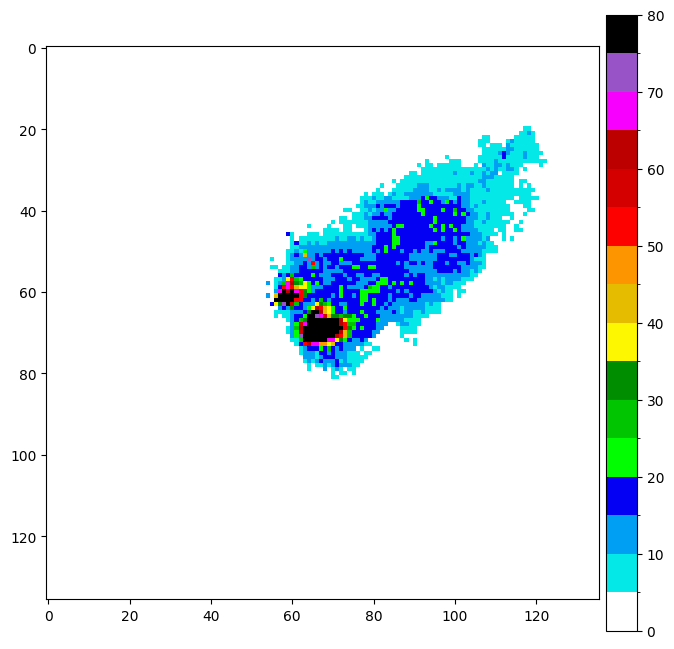

In [ ]:
fig = plt.figure(figsize=(8.5,8))
ax = plt.subplot(1,1,1)
mmp = ax.imshow(np.flipud(explanation.anchor[:,:,0]) * np.flipud(x_test[7,:,:,0]), cmap=cmap, norm=norm)
plt.colorbar(mmp, ax=ax, pad=0.01)

In [ ]:
preds = model.predict(x_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step


In [ ]:
top_cell = x_test[np.argmax(preds[:,0])]
top_mix = x_test[np.argmax(preds[:,1])]
top_lin = x_test[np.argmax(preds[:,2])]
top_other = x_test[np.argmax(preds[:,3])]

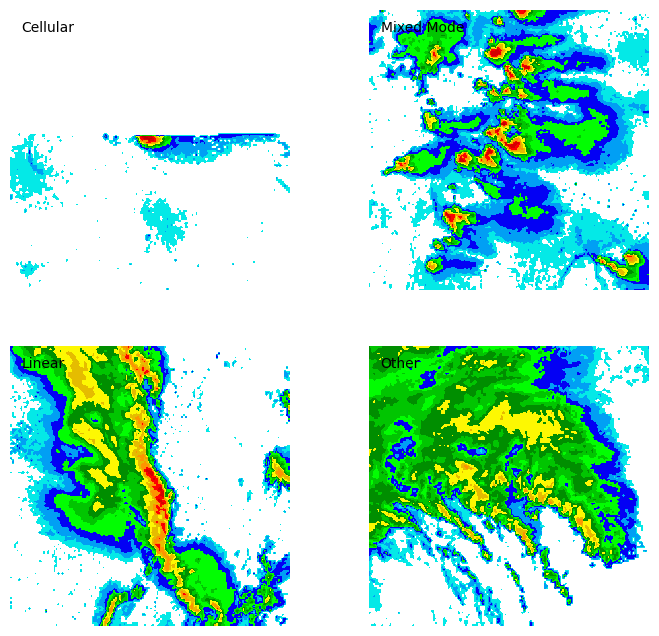

In [ ]:
fig = plt.figure(figsize=(8.5,8))

for idx, data in enumerate([top_cell, top_mix, top_lin, top_other]):
  ax = plt.subplot(2,2,idx+1)
  mmp = ax.imshow(np.flipud(data[:,:,0]) * 80, cmap=cmap, norm=norm)
  ax.annotate(target_names[idx], xy=(5,10), fontsize=10, color='black')
  plt.axis('off')

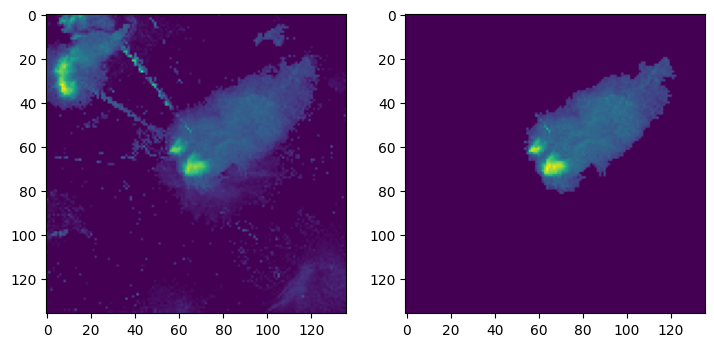

In [ ]:
fig = plt.figure(figsize=(8.5,8))

ax1 = plt.subplot(1,2,1)
mmp = ax1.imshow(np.flipud(x_test[7,:,:,0]))

ax2 = plt.subplot(1,2,2)
mmp = ax2.imshow(np.flipud(explanation.anchor[:,:,0]))

In [ ]:
np.max(explanation.anchor[:,:,0])

223

In [ ]:
anchor_images = []
anchor_index = []

for i in range(len(x_test)):

  explanation = explainer.explain(x_test[i,:,:,:], threshold=.95, p_sample=.9, seed=0)

  if np.max(explanation.anchor) !=0:
    anchor_images.append(explanation.anchor)
    anchor_index.append(i)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 877ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 794ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 493ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 761ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 489ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 491ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 708ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 870ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 488ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 482ms/step
4/

KeyboardInterrupt: 

In [ ]:
print(anchor_index)

[7, 8, 9, 10, 11, 13, 15, 16, 19, 20, 24, 28, 30, 31, 32, 33, 34, 35, 36, 37, 42, 43, 56, 57, 58, 59, 60, 62, 67, 68, 69, 70, 71, 73, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 91, 92, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 119, 121, 124, 125, 126, 127, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 249, 250, 251, 252, 253, 254, 255, 256, 257, 259, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274

In [ ]:
threshold_images = []
for threshold in np.arange(0.70, 0.96, 0.050):

  explanation = explainer.explain(x_test[708,:,:,:], threshold=threshold, p_sample=.9, seed=0)
  threshold_images.append(explanation.anchor)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 481ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 481ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 493ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 700ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 660ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 655ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 551ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 486ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 472ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 841ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 481ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 475ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 642ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 908ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 871ms/step


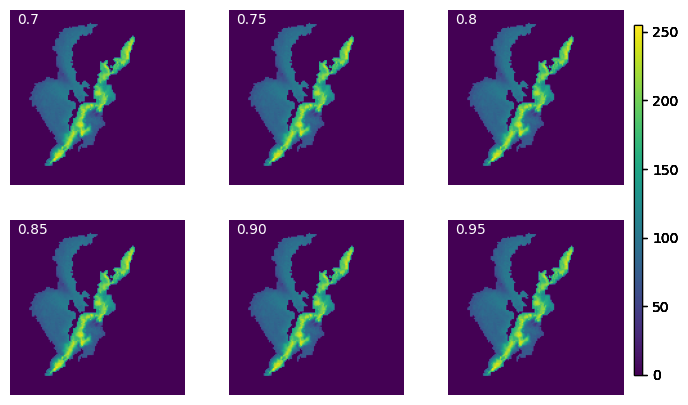

In [ ]:
threshold_images = np.array(threshold_images)
fig = plt.figure(figsize=(8,5))

for idx, data in enumerate(threshold_images):
  ax = plt.subplot(2,3,idx+1)
  mmp = ax.imshow(np.flipud(data[:,:,0]))
  ax.annotate(str(np.arange(0.70, 0.96, 0.050)[idx])[:4], xy=(5,10), fontsize=10, color='white')
  plt.axis('off')
  cbar_ax = fig.add_axes([0.91, 0.15, 0.01, 0.7])
  plt.colorbar(mmp, ax=ax, pad=0.01, cax=cbar_ax)

'0.90'